In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
from statsbombpy import sb
from mplsoccer import VerticalPitch

# List of match IDs
ids = [3888705, 3888704, 3888854, 3889218, 3889217, 3888702, 
       3888701, 3888700, 3888699, 3750234]

# Initialize an empty list for events
events = []

# Loop through each match ID
for n in ids:
    match_events = sb.events(match_id=n)
    events.append(match_events)

# Concatenate all events into a single DataFrame
events = pd.concat(events, ignore_index=True)

In [2]:
events.columns

Index(['50_50', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_deflection', 'block_offensive',
       'carry_end_location', 'clearance_aerial_won', 'clearance_body_part',
       'clearance_head',
       ...
       'pass_miscommunication', 'goalkeeper_shot_saved_to_post',
       'shot_saved_to_post', 'substitution_outcome',
       'substitution_replacement', 'dribble_no_touch', 'bad_behaviour_card',
       'goalkeeper_shot_saved_off_target', 'shot_follows_dribble',
       'shot_saved_off_target'],
      dtype='object', length=104)

In [3]:
df = events

In [4]:
#separate start and end locations from coordinates
df[['x', 'y']] = df['location'].apply(pd.Series)
df[['pass_end_x', 'pass_end_y']] = df['pass_end_location'].apply(pd.Series)
df[['carry_end_x', 'carry_end_y']] = df['carry_end_location'].apply(pd.Series)
#Filter for shots, passes and carries
df = df[df['type'].isin(['Shot', 'Pass', 'Carry'])]

#Filter for player
df = df[df['player'] == 'Édson Arantes do Nascimento']

/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_41035/3779331015.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['x', 'y']] = df['location'].apply(pd.Series)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_41035/3779331015.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[['x', 'y']] = df['location'].apply(pd.Series)
/var/folders/dv/7l2p8f4j2gbcl552tflf3zw40000gn/T/ipykernel_41035/3779331015.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.

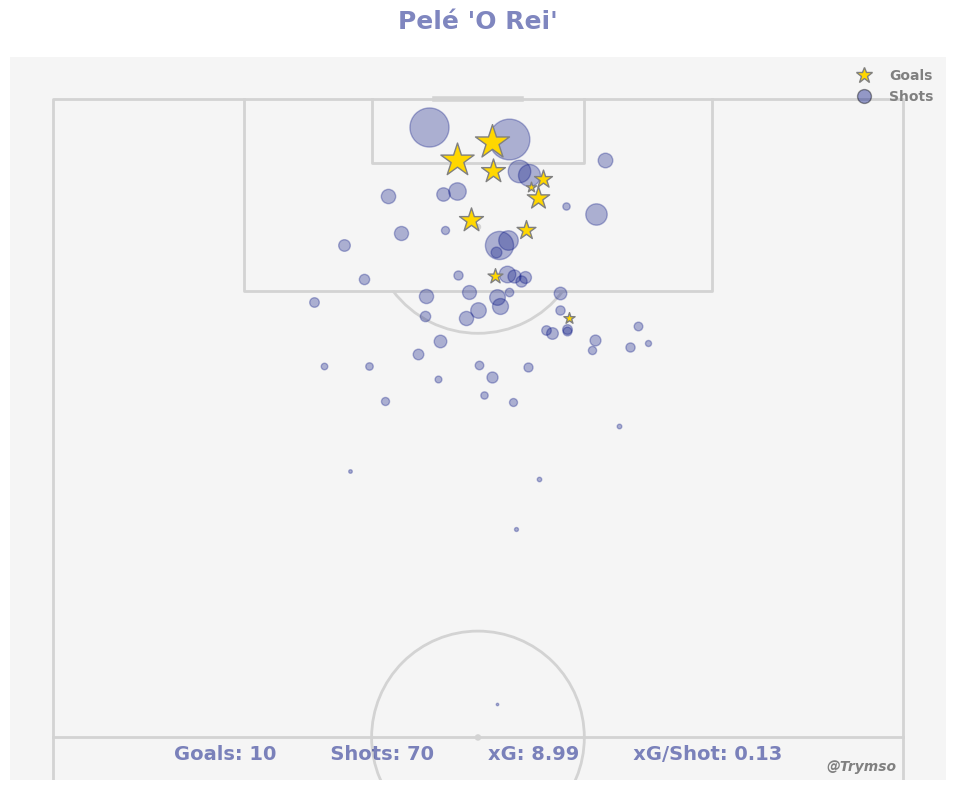

In [5]:
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt
import pandas as pd

# Create the pitch
pitch = VerticalPitch(pitch_type='statsbomb', half=True, pitch_color='#f5f5f5', 
                      line_color='#d3d3d3', line_zorder=1)
fig, ax = pitch.draw(figsize=(12, 8))

# Filter the dataframe: only shots
df_shots = df[df['type'] == 'Shot']

# Calculate summary stats
total_shots = len(df_shots)
goals = len(df_shots[df_shots['shot_outcome'] == 'Goal'])
total_xg = df_shots['shot_statsbomb_xg'].sum()
xg_per_shot = total_xg / total_shots if total_shots > 0 else 0

# Plot shots and goals
for _, row in df_shots.iterrows():
    if row['shot_outcome'] == 'Goal':
        # Plot goals with star markers
        pitch.scatter(
            x=row['x'], y=row['y'], 
            ax=ax, 
            s=1000 * (row['shot_statsbomb_xg'] if not pd.isna(row['shot_statsbomb_xg']) else 0.1), 
            color='gold', edgecolor='grey', zorder=3, marker='*'
        )
    else:
        # Plot all other shots as circles
        pitch.scatter(
            x=row['x'], y=row['y'], 
            ax=ax, 
            s=1000 * (row['shot_statsbomb_xg'] if not pd.isna(row['shot_statsbomb_xg']) else 0.1), 
            color='#010E80', edgecolor='#010E80', alpha=0.3, zorder=2
        )

# Add summary statistics as text at the halfway line
summary_text = (f"Goals: {goals}        "
                f"Shots: {total_shots}        "
                f"xG: {total_xg:.2f}        "
                f"xG/Shot: {xg_per_shot:.2f}")


fig.text(0.5, 0.05, summary_text, fontsize=14, fontweight='bold', 
         color='#010E80', ha='center', va='center', fontfamily='DejaVu Sans', alpha=.5)

# Add legend
legend_elements = [
    plt.Line2D([0], [0], color='gold', marker='*', label='Goals', markersize=12, linestyle='', markeredgecolor='grey'),
    plt.Line2D([0], [0], color='#010E80', marker='o', label='Shots', markersize=10, linestyle='', markeredgecolor='black', alpha=0.4)
]
legend = ax.legend(handles=legend_elements, loc='upper right', fontsize=10, frameon=False)

# Style legend text
for text in legend.get_texts():
    text.set_color('grey')
    text.set_fontweight('bold')
    text.set_fontfamily('DejaVu Sans')

# Add a title
ax.set_title("Pelé 'O Rei'", 
             fontsize=18, fontweight='bold', fontfamily='DejaVu Sans', color='#010E80', pad=20, alpha=.5)

# Add Twitter handle
fig.text(0.79, 0.03, '@Trymso', fontsize=10, fontstyle='italic',
         fontweight='bold', fontfamily='DejaVu Sans', color='gray')

plt.show()


In [6]:
#fig.savefig('/Users/Trymso/Desktop/Pelé_shots.png', dpi=300, bbox_inches='tight')